In [1]:
import keras
from keras.datasets import cifar10

In [2]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [3]:
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [4]:
x_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

+ 총 6만장 32x32 크기의 RGB 채널

In [5]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [6]:
y_test[0]

array([3], dtype=uint8)

In [7]:
import numpy as np
import matplotlib.pyplot as plt

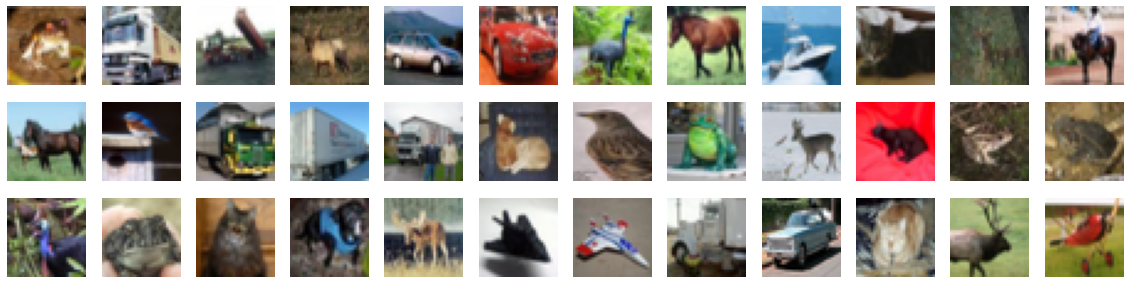

In [8]:
fig,ax=plt.subplots(3,12,figsize=(20,5))
ax=ax.ravel()
for i in range(36):
    ax[i].imshow(x_train[i])
    ax[i].axis('off')
plt.show()

In [9]:
# data 정규화
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

In [10]:
from keras.utils import to_categorical

In [11]:
num_classes=len(np.unique(y_train))
y_train=to_categorical(y_train,num_classes)
y_test=to_categorical(y_test,num_classes)

In [12]:
print('class 개수 : ', num_classes)
print('y_train[0] : ',y_train[0])
print('y_train[0].shape : ',y_train[0].shape) # 1x10
print('y_train.shape : ',y_train.shape)

class 개수 :  10
y_train[0] :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
y_train[0].shape :  (10,)
y_train.shape :  (50000, 10)


In [13]:
(x_train,x_valid)=x_train[5000:],x_train[:5000]
(y_train,y_valid)=y_train[5000:],y_train[:5000]

In [14]:
x_train.shape

(45000, 32, 32, 3)

+ 45000장  
+ 32x32  
+ RGB 채널 3개

In [15]:
y_train.shape

(45000, 10)

In [16]:
x_valid.shape, y_valid.shape

((5000, 32, 32, 3), (5000, 10))

In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

# AlexNet 간략버전  

+ Conv2D ➡️ MaxPooling ➡️ Conv2D ➡️ MaxPooling ➡️ Conv2D ➡️ MaxPooling  ➡️ Dense ➡️ Dense

In [18]:
model=Sequential()

model.add(Conv2D(filters=16,kernel_size=2,padding='same',activation='relu',input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=32,kernel_size=2,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=2,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(500,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(10,activation='softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

In [20]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [21]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [22]:
checkpointer=ModelCheckpoint(filepath='model.weights.best.hdf5',verbose=1,save_best_only=True)

In [23]:
early_stopping=EarlyStopping(monitor='val_loss',min_delta=0,patience=5)

In [24]:
hist=model.fit(x_train,y_train,batch_size=32,epochs=100,
               validation_data=(x_valid,y_valid),
               callbacks=[checkpointer,early_stopping],
               verbose=2,
               shuffle=True)

Epoch 1/100

Epoch 1: val_loss improved from inf to 1.69932, saving model to model.weights.best.hdf5
1407/1407 - 15s - loss: 1.6173 - accuracy: 0.4145 - val_loss: 1.6993 - val_accuracy: 0.4252 - 15s/epoch - 11ms/step
Epoch 2/100

Epoch 2: val_loss improved from 1.69932 to 1.16778, saving model to model.weights.best.hdf5
1407/1407 - 6s - loss: 1.3010 - accuracy: 0.5348 - val_loss: 1.1678 - val_accuracy: 0.5916 - 6s/epoch - 4ms/step
Epoch 3/100

Epoch 3: val_loss improved from 1.16778 to 1.12129, saving model to model.weights.best.hdf5
1407/1407 - 6s - loss: 1.1790 - accuracy: 0.5823 - val_loss: 1.1213 - val_accuracy: 0.6046 - 6s/epoch - 4ms/step
Epoch 4/100

Epoch 4: val_loss did not improve from 1.12129
1407/1407 - 9s - loss: 1.1053 - accuracy: 0.6111 - val_loss: 1.1636 - val_accuracy: 0.5942 - 9s/epoch - 6ms/step
Epoch 5/100

Epoch 5: val_loss improved from 1.12129 to 0.97414, saving model to model.weights.best.hdf5
1407/1407 - 7s - loss: 1.0575 - accuracy: 0.6296 - val_loss: 0.9741 -

In [25]:
model2=Sequential()

model2.add(Conv2D(filters=16,kernel_size=2,padding='same',activation='relu',input_shape=(32, 32, 3)))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Conv2D(filters=32,kernel_size=2,padding='same',activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Conv2D(filters=64,kernel_size=2,padding='same',activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Dropout(0.3))

model2.add(Flatten())

model2.add(Dense(500,activation='relu'))
model2.add(Dropout(0.4))

model2.add(Dense(10,activation='softmax'))

In [26]:
model2.load_weights('model.weights.best.hdf5')

In [27]:
model2.compile(loss='categorical_crossentropy',metrics=['accuracy'])

In [28]:
model2.evaluate(x_test,y_test,verbose=0)

[0.9290936589241028, 0.6794000267982483]

# 다른 모델도 구축해보자